In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\WEBFALA-002\Desktop\Crystal Files\DataSets\Crop_Recommendation.csv")
df

Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0           90          42         43    20.879744  82.002744  6.502985   
1           85          58         41    21.770462  80.319644  7.038096   
2           60          55         44    23.004459  82.320763  7.840207   
3           74          35         40    26.491096  80.158363  6.980401   
4           78          42         42    20.130175  81.604873  7.628473   
...        ...         ...        ...          ...        ...       ...   
2195       107          34         32    26.774637  66.413269  6.780064   
2196        99          15         27    27.417112  56.636362  6.086922   
2197       118          33         30    24.131797  67.225123  6.362608   
2198       117          32         34    26.272418  52.127394  6.758793   
2199       104          18         30    23.603016  60.396475  6.779833   

        Rainfall    Crop  
0     202.935536    Rice  
1     226.655537    Rice  
2     263.964248    Rice  
3     242.864034    Rice  
4     262.717340    Rice  
...          ...     ...  
2195  177.774507  Coffee  
2196  127.924610  Coffee  
2197  173.322839  Coffee  
2198  127.175293  Coffee  
2199  140.937041  Coffee  

[2200 rows x 8 columns]

In [3]:
df2=df.copy()
df2.head()

Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     Rainfall  Crop  
0  202.935536  Rice  
1  226.655537  Rice  
2  263.964248  Rice  
3  242.864034  Rice  
4  262.717340  Rice

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df2.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [6]:
df2['Crop'].value_counts()

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

In [7]:
df2['Crop'].nunique()

22

In [8]:
df2.describe(include='all')

Nitrogen   Phosphorus    Potassium  Temperature     Humidity  \
count   2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      50.551818    53.362727    48.149091    25.616244    71.481779   
std       36.917334    32.985883    50.647931     5.063749    22.263812   
min        0.000000     5.000000     5.000000     8.825675    14.258040   
25%       21.000000    28.000000    20.000000    22.769375    60.261953   
50%       37.000000    51.000000    32.000000    25.598693    80.473146   
75%       84.250000    68.000000    49.000000    28.561654    89.948771   
max      140.000000   145.000000   205.000000    43.675493    99.981876   

           pH_Value     Rainfall  Crop  
count   2200.000000  2200.000000  2200  
unique          NaN          NaN    22  
top             NaN          NaN  Rice  
freq            NaN          NaN   100  
mean       6.469480   103.463655   NaN  
std        0.773938    54.958389   NaN  
min        3.504752    20.211267   NaN  
25%        5.971693    64.551686   NaN  
50%        6.425045    94.867624   NaN  
75%        6.923643   124.267508   NaN  
max        9.935091   298.560117   NaN

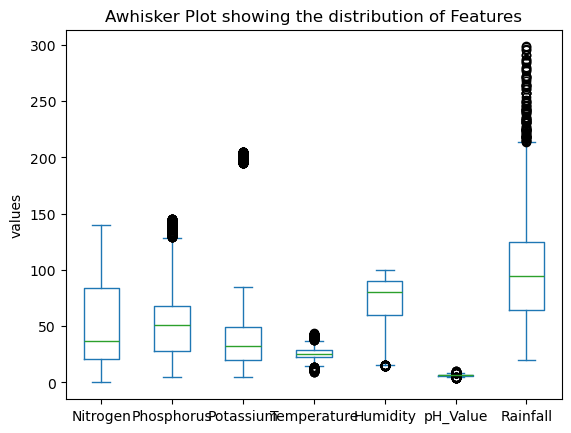

In [9]:
df2.plot(kind='box')
plt.title('Awhisker Plot showing the distribution of Features')
plt.ylabel('values');

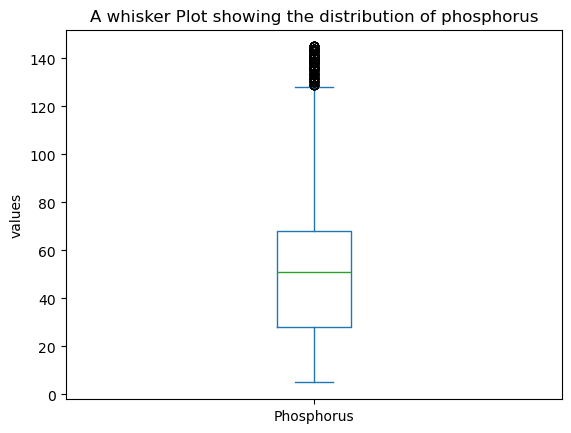

In [10]:
df2['Phosphorus'].plot(kind='box')
plt.title('A whisker Plot showing the distribution of phosphorus')
plt.ylabel('values');

# The correlation matrix 

In [11]:
corr_matrix=df2.drop('Crop',axis= 1).corr()

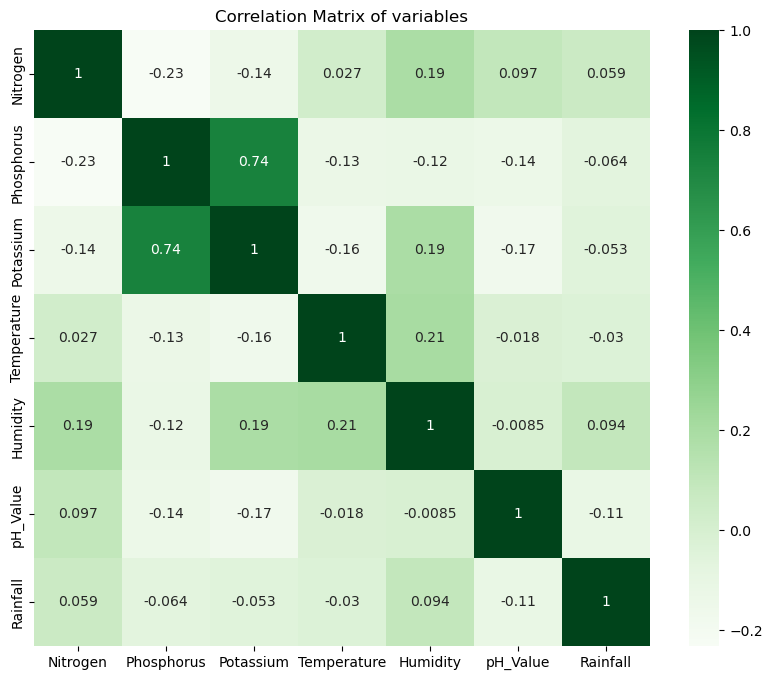

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot = True, 
            cmap='Greens',
            square= True)
plt.title('Correlation Matrix of variables')
plt.show()

* Outliers in the data is handled first to ensure a successful scaling, and improve model performance, to preserve the original distribution of of the dataset

# Handling outliers

In [13]:
df2['Phosphorus'] = df2['Phosphorus'].clip(lower= None, upper=110)

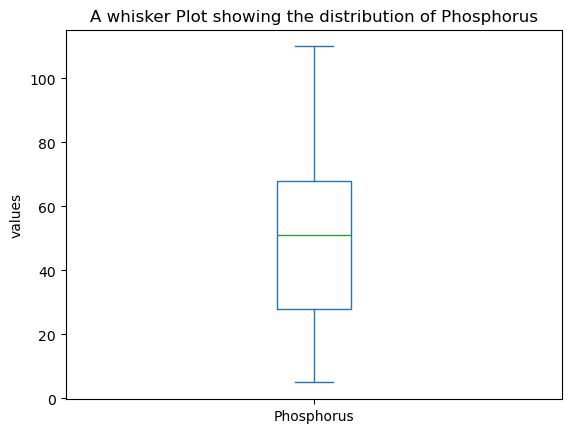

In [14]:
# to confirm the capping 
df2.Phosphorus.plot(kind='box')
plt.title('A whisker Plot showing the distribution of Phosphorus')
plt.ylabel('values');

In [15]:
df2['Rainfall'] = df2['Rainfall'].clip(lower= None, upper=200)

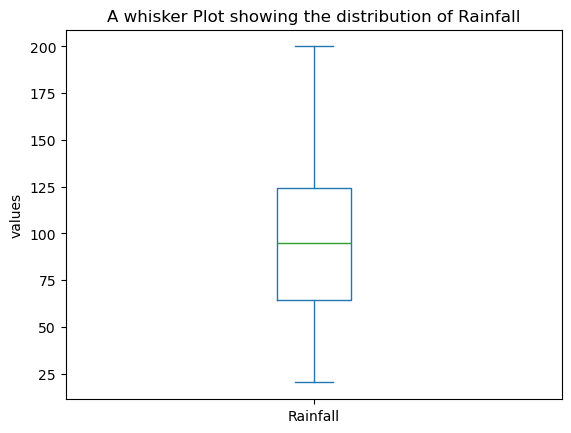

In [16]:
df2['Rainfall'].plot(kind='box')
plt.title('A whisker Plot showing the distribution of Rainfall')
plt.ylabel('values');

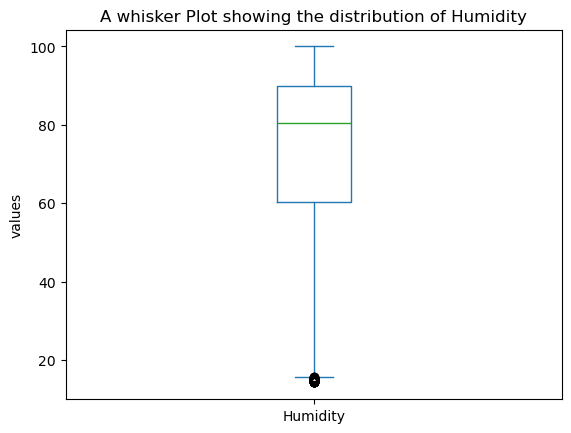

In [17]:
df2['Humidity'].plot(kind='box')
plt.title('A whisker Plot showing the distribution of Humidity')
plt.ylabel('values');

In [18]:
df2['Humidity'] = df2['Humidity'].clip(lower= 20, upper=None)

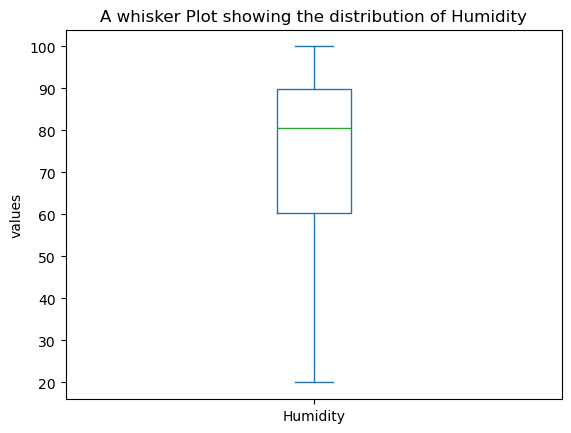

In [19]:
df2['Humidity'].plot(kind='box')
plt.title('A whisker Plot showing the distribution of Humidity')
plt.ylabel('values');

In [20]:
mean_value=df2['Potassium'].mean()
median_value=df2['Potassium'].median()

In [21]:
import numpy as np
z_scores=np.abs((df2['Potassium']-
                 mean_value)/
                df2['Potassium'].std())

In [22]:
outliers=df2[z_scores>2]
outliers['Potassium'].head(20)

1200    195
1201    204
1202    205
1203    196
1204    196
1205    198
1206    197
1207    195
1208    203
1209    204
1210    197
1211    205
1212    201
1213    203
1214    204
1215    195
1216    202
1217    205
1218    197
1219    204
Name: Potassium, dtype: int64

In [23]:
df2['Potassium'] = df2['Potassium'].clip(lower= None, upper=80)

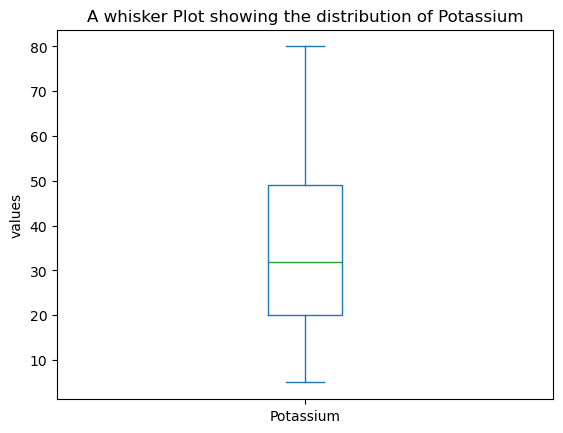

In [24]:
df2['Potassium'].plot(kind='box')
plt.title('A whisker Plot showing the distribution of Potassium')
plt.ylabel('values');

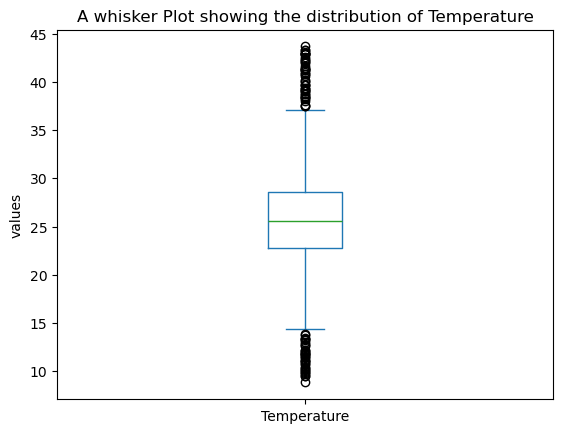

In [25]:
df2['Temperature'].plot(kind='box')
plt.title('A whisker Plot showing the distribution of Temperature')
plt.ylabel('values');

In [26]:
#Using the IQR Method 
Q1 = df2['Temperature'].quantile(0.25)
Q3 = df2['Temperature'].quantile(0.75)
IQR = Q3-Q1

In [27]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [28]:
lower_bound
upper_bound

37.2500728825

In [29]:
df2['Temperature'] = df2['Temperature'].clip(lower=lower_bound,
                                              upper=upper_bound)

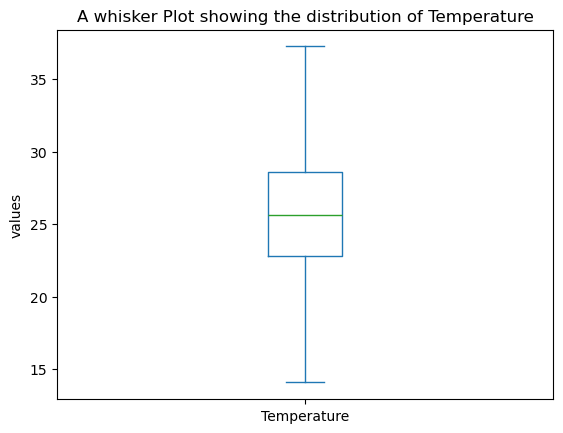

In [30]:
df2['Temperature'].plot(kind='box')
plt.title('A whisker Plot showing the distribution of Temperature')
plt.ylabel('values');

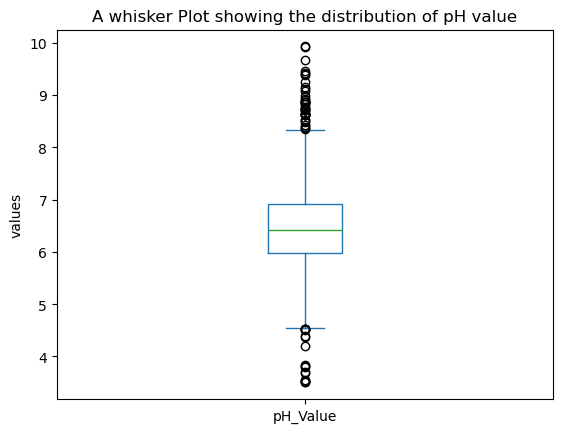

In [31]:
df2['pH_Value'].plot(kind='box')
plt.title('A whisker Plot showing the distribution of pH value')
plt.ylabel('values');

In [32]:
#Using the IQR Method 
Q1 = df2['pH_Value'].quantile(0.25)
Q3 = df2['pH_Value'].quantile(0.75)
IQR = Q3-Q1

In [33]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [34]:
upper_bound

8.351567354250001

In [35]:
df2['pH_Value'] = df2['pH_Value'].clip(lower=lower_bound,
                                       upper=upper_bound)

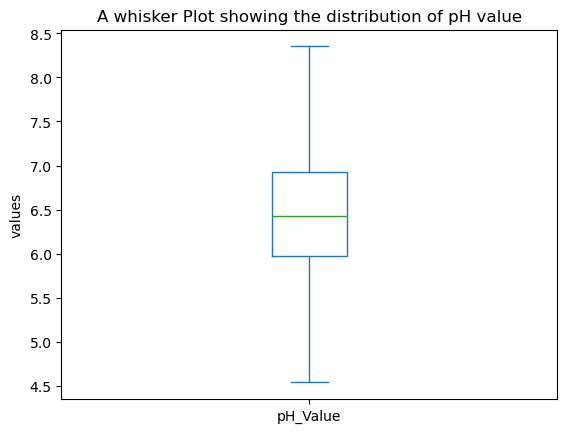

In [36]:
df2['pH_Value'].plot(kind='box')
plt.title('A whisker Plot showing the distribution of pH value')
plt.ylabel('values');

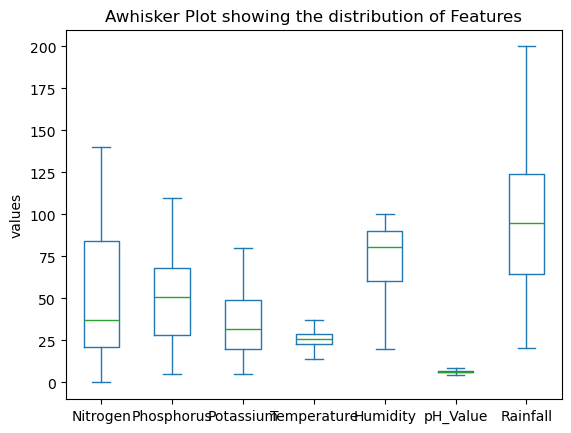

In [37]:
df2.plot(kind='box')
plt.title('Awhisker Plot showing the distribution of Features')
plt.ylabel('values');

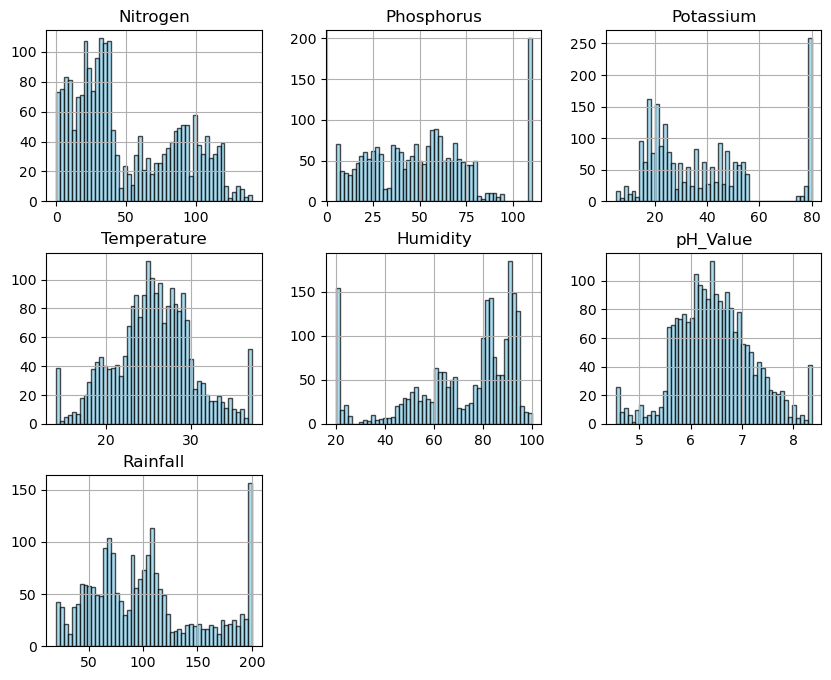

In [38]:
df2.hist(figsize=(10,8),
         bins=50,
         alpha=0.7,
         color='skyblue',
         edgecolor='black')
plt.show()

In [39]:
df2.head()

Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

   Rainfall  Crop  
0     200.0  Rice  
1     200.0  Rice  
2     200.0  Rice  
3     200.0  Rice  
4     200.0  Rice

# Categorizing the crop

In [40]:
Crop_categories={'Cereals': ['Rice','Maize'],
                 'Fibers': ['Jute','Cotton'],
                 'Fruits' : ['Coconut','Papaya','Orange','Apple','Muskmelon','Watermelon','Grapes','Mango','Banana','Pomegranate'],
                 'Pulses' : ['Lentil','Blackgram','MungBean','MothBeans','PigeonPeas','KidneyBeans','ChickPea'],
                 'Beverage' : ['Coffee']}

In [41]:
df2['Category']= df2['Crop'].apply(lambda x:
                                   [k for k, v in Crop_categories.items()
                                    if x in v][0]
                                   if x in [item for sublist in Crop_categories.values()
                                            for item in sublist] else 'Unkown')

In [42]:
df2.head()

Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

   Rainfall  Crop Category  
0     200.0  Rice  Cereals  
1     200.0  Rice  Cereals  
2     200.0  Rice  Cereals  
3     200.0  Rice  Cereals  
4     200.0  Rice  Cereals

# Correlation Analysis between environmental factors and crop

* Using one-hot encoder for categorical column
This is to avoid correlation analysis interpreting categorical values as having a numerical relationship leading to incorrect conclusions 

In [43]:
df2=df2.drop('Crop',axis=1)

In [44]:
df2=pd.get_dummies(df2,columns=['Category'],drop_first=True).astype(int)

In [45]:
df2.head()

Nitrogen  Phosphorus  Potassium  Temperature  Humidity  pH_Value  Rainfall  \
0        90          42         43           20        82         6       200   
1        85          58         41           21        80         7       200   
2        60          55         44           23        82         7       200   
3        74          35         40           26        80         6       200   
4        78          42         42           20        81         7       200   

   Category_Cereals  Category_Fibers  Category_Fruits  Category_Pulses  
0                 1                0                0                0  
1                 1                0                0                0  
2                 1                0                0                0  
3                 1                0                0                0  
4                 1                0                0                0

In [46]:
correlation_matrix = df2.corr()

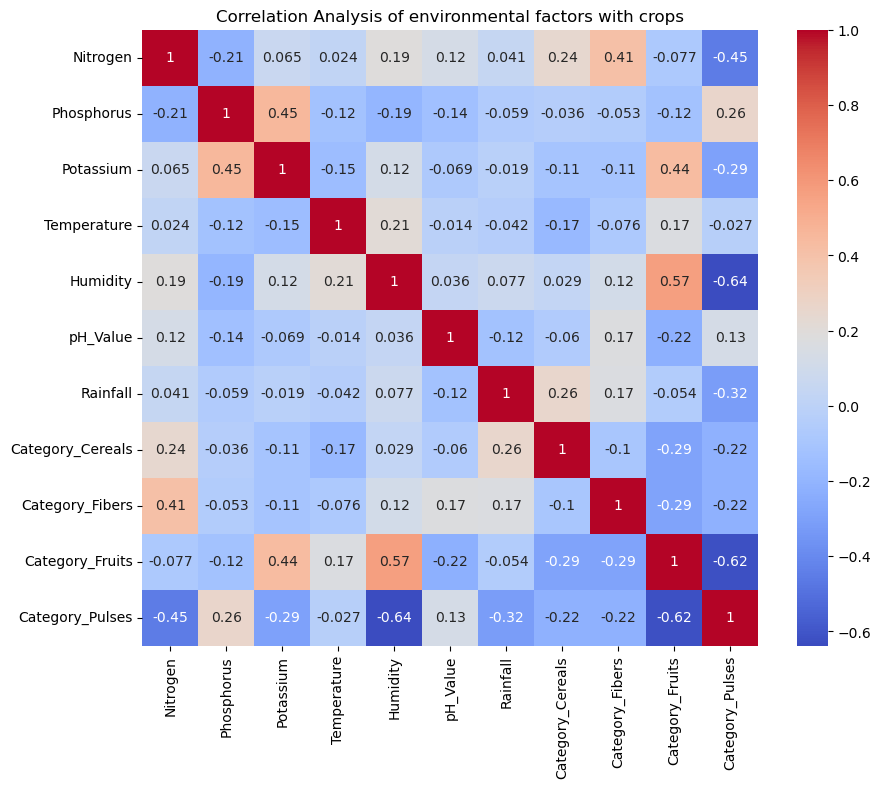

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot = True, 
            cmap='coolwarm',
            square= True)
plt.title('Correlation Analysis of environmental factors with crops')
plt.show()

### Results from the correlation matrix
* Fruits have a moderate correlation of 0.44 and 0.57 with Potassium and Humidity. They have a sensitive reaction to potassium, deficiency may result in reduced quality or potassium, high level of humidity might promote fruit growth while low level may lead to water stress.
* Fibers have a moderate correlation of 0.41 with Nitrogen, crops with higher fiber content may require more nitrogen
* Pulses have a weak correlation of 0.26 with Phosphorus, hence its impact might be less significant
* Cereals have weak positive correlation of 0.26 and 0.24 with Rainfall and Nitrogen.
#### Pulses
* Pulses crop have a strong negative correlation with humidity because pulses are sensitive to water logging, fungal disease caused by high humidity causing powdery mildew or root rot, reduced soil aeration.
* The high negative correlation between pulses and nitrogen may be as a result of Pulses natural ability to fix nitrogen, they may thrive with low nitrogen availability. Or inadequate potassium and phosphorus to enable pulses fix nitrogen effectively.

# Cluster analysis

In [48]:
# scaling the dataset
from sklearn.preprocessing import RobustScaler

In [49]:
scaler= RobustScaler()

In [50]:
scaled_data= scaler.fit_transform(df2)

In [51]:
scaled_data

array([[ 0.83794466, -0.225     ,  0.37931034, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.75889328,  0.175     ,  0.31034483, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.36363636,  0.1       ,  0.4137931 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.28063241, -0.45      , -0.06896552, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.26482213, -0.475     ,  0.06896552, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.05928854, -0.825     , -0.06896552, ...,  0.        ,
         0.        ,  0.        ]])

In [52]:
original_df=pd.read_csv(r"C:\Users\WEBFALA-002\crop_yield.csv")
original_df.head()

Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

   Rainfall  Crop Category  
0     200.0  Rice  Cereals  
1     200.0  Rice  Cereals  
2     200.0  Rice  Cereals  
3     200.0  Rice  Cereals  
4     200.0  Rice  Cereals

In [53]:
original_df['Crop'].nunique()

22

In [54]:
encoded_df=pd.get_dummies(original_df,columns=['Crop', 'Category'],
                          drop_first=False).astype(int)

In [55]:
encoded_df.head()

Nitrogen  Phosphorus  Potassium  Temperature  Humidity  pH_Value  Rainfall  \
0        90          42         43           20        82         6       200   
1        85          58         41           21        80         7       200   
2        60          55         44           23        82         7       200   
3        74          35         40           26        80         6       200   
4        78          42         42           20        81         7       200   

   Crop_Apple  Crop_Banana  Crop_Blackgram  ...  Crop_PigeonPeas  \
0           0            0               0  ...                0   
1           0            0               0  ...                0   
2           0            0               0  ...                0   
3           0            0               0  ...                0   
4           0            0               0  ...                0   

   Crop_Pomegranate  Crop_Rice  Crop_Watermelon  Category_Beverage  \
0                 0          1                0                  0   
1                 0          1                0                  0   
2                 0          1                0                  0   
3                 0          1                0                  0   
4                 0          1                0                  0   

   Category_Cereals  Category_Fibers  Category_Fruits  Category_Pulses  \
0                 1                0                0                0   
1                 1                0                0                0   
2                 1                0                0                0   
3                 1                0                0                0   
4                 1                0                0                0   

   Category_Unkown  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 35 columns]

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [57]:
# selecting relevant features
features=encoded_df[['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','pH_Value','Rainfall']]
features.head()

Nitrogen  Phosphorus  Potassium  Temperature  Humidity  pH_Value  Rainfall
0        90          42         43           20        82         6       200
1        85          58         41           21        80         7       200
2        60          55         44           23        82         7       200
3        74          35         40           26        80         6       200
4        78          42         42           20        81         7       200

In [58]:
# Scaling the features
from sklearn.preprocessing import StandardScaler

In [59]:
SS_scaler=StandardScaler()

In [60]:
scaled_features=SS_scaler.fit_transform(features)

In [61]:
scaled_features

array([[ 1.0687974 , -0.32928536,  0.2794309 , ...,  0.49694024,
         0.06348894,  1.99656103],
       [ 0.93332887,  0.24104602,  0.1834665 , ...,  0.40521539,
         1.32182825,  1.99656103],
       [ 0.25598625,  0.13410889,  0.32741311, ...,  0.49694024,
         1.32182825,  1.99656103],
       ...,
       [ 1.82742114, -0.65009676, -0.34433774, ..., -0.19099616,
         0.06348894,  1.45316959],
       [ 1.80032743, -0.68574247, -0.15240893, ..., -0.87893257,
         0.06348894,  0.52739158],
       [ 1.44810927, -1.18478242, -0.34433774, ..., -0.51203315,
         0.06348894,  0.7890245 ]])

In [62]:
# Perfoming clustering using KNN
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=8)

In [63]:
cluster_labels= kmeans.fit_predict(scaled_features)

In [64]:
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
# To add the clusters to the dataset
encoded_df['cluster_labels']=cluster_labels

In [66]:
encoded_df.tail(10)

Nitrogen  Phosphorus  Potassium  Temperature  Humidity  pH_Value  \
2190       103          40         30           27        55         6   
2191       118          31         34           27        62         6   
2192       106          21         35           25        57         7   
2193       116          38         34           23        50         6   
2194        97          35         26           24        53         6   
2195       107          34         32           26        66         6   
2196        99          15         27           27        56         6   
2197       118          33         30           24        67         6   
2198       117          32         34           26        52         6   
2199       104          18         30           23        60         6   

      Rainfall  Crop_Apple  Crop_Banana  Crop_Blackgram  ...  \
2190       141           0            0               0  ...   
2191       181           0            0               0  ...   
2192       188           0            0               0  ...   
2193       183           0            0               0  ...   
2194       166           0            0               0  ...   
2195       177           0            0               0  ...   
2196       127           0            0               0  ...   
2197       173           0            0               0  ...   
2198       127           0            0               0  ...   
2199       140           0            0               0  ...   

      Crop_Pomegranate  Crop_Rice  Crop_Watermelon  Category_Beverage  \
2190                 0          0                0                  1   
2191                 0          0                0                  1   
2192                 0          0                0                  1   
2193                 0          0                0                  1   
2194                 0          0                0                  1   
2195                 0          0                0                  1   
2196                 0          0                0                  1   
2197                 0          0                0                  1   
2198                 0          0                0                  1   
2199                 0          0                0                  1   

      Category_Cereals  Category_Fibers  Category_Fruits  Category_Pulses  \
2190                 0                0                0                0   
2191                 0                0                0                0   
2192                 0                0                0                0   
2193                 0                0                0                0   
2194                 0                0                0                0   
2195                 0                0                0                0   
2196                 0                0                0                0   
2197                 0                0                0                0   
2198                 0                0                0                0   
2199                 0                0                0                0   

      Category_Unkown  cluster_labels  
2190                0               0  
2191                0               0  
2192                0               0  
2193                0               0  
2194                0               0  
2195                0               0  
2196                0               0  
2197                0               0  
2198                0               0  
2199                0               0  

[10 rows x 36 columns]

In [67]:
encoded_df.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop_Apple', 'Crop_Banana', 'Crop_Blackgram',
       'Crop_ChickPea', 'Crop_Coconut', 'Crop_Coffee', 'Crop_Cotton',
       'Crop_Grapes', 'Crop_Jute', 'Crop_KidneyBeans', 'Crop_Lentil',
       'Crop_Maize', 'Crop_Mango', 'Crop_MothBeans', 'Crop_MungBean',
       'Crop_Muskmelon', 'Crop_Orange', 'Crop_Papaya', 'Crop_PigeonPeas',
       'Crop_Pomegranate', 'Crop_Rice', 'Crop_Watermelon', 'Category_Beverage',
       'Category_Cereals', 'Category_Fibers', 'Category_Fruits',
       'Category_Pulses', 'Category_Unkown', 'cluster_labels'],
      dtype='object')

In [68]:
encoded_df['cluster_labels'].value_counts() 

cluster_labels
7    440
3    348
0    325
1    308
6    293
4    207
2    179
5    100
Name: count, dtype: int64

In [69]:
437+421+292+287+249+214+200+100

2200

In [70]:
# to analyze the cluster characteristics
print(encoded_df.groupby('cluster_labels')[['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','pH_Value','Rainfall']].mean())

                  Nitrogen  Phosphorus  Potassium  Temperature   Humidity  \
cluster_labels                                                              
0                83.870769   42.221538  36.618462    24.193846  73.581538   
1                25.675325   55.470779  21.928571    24.688312  41.204545   
2                21.284916  110.000000  80.000000    21.363128  87.173184   
3               102.977011   29.712644  37.347701    25.051724  82.795977   
4                72.077295   75.579710  52.874396    30.603865  84.787440   
5                40.090000   67.790000  78.520000    18.390000  20.000000   
6                19.870307   17.460751  27.378840    23.426621  91.812287   
7                26.479545   55.331818  20.447727    27.684091  66.109091   

                pH_Value    Rainfall  
cluster_labels                        
0               6.187692  175.298462  
1               4.857143  104.386364  
2               5.446927   93.044693  
3               6.100575   55.5862

In [71]:
# to visualize cluster distribution of crops using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca=PCA(n_components=4)

In [72]:
pca_features=pca.fit_transform(scaled_features)

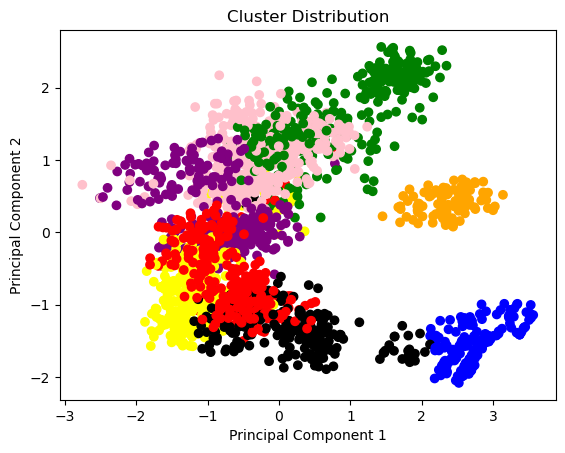

In [73]:
colors=['red','green','blue','yellow','black','orange','purple','pink']
plt.scatter(pca_features[:, 0],
            pca_features[:, 1],
            c=[colors[i]for i in cluster_labels])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Distribution');


In [74]:
newCrops=encoded_df[['Crop_Apple','Crop_Banana', 'Crop_Blackgram',
       'Crop_ChickPea', 'Crop_Coconut', 'Crop_Coffee', 'Crop_Cotton',
       'Crop_Grapes', 'Crop_Jute', 'Crop_KidneyBeans', 'Crop_Lentil',
       'Crop_Maize', 'Crop_Mango', 'Crop_MothBeans', 'Crop_MungBean',
       'Crop_Muskmelon', 'Crop_Orange', 'Crop_Papaya', 'Crop_PigeonPeas',
       'Crop_Pomegranate', 'Crop_Rice', 'Crop_Watermelon']]

In [75]:
crop_proportion=newCrops.groupby(encoded_df['cluster_labels']).mean()
crop_proportion

Crop_Apple  Crop_Banana  Crop_Blackgram  Crop_ChickPea  \
cluster_labels                                                           
0                 0.000000     0.000000        0.000000            0.0   
1                 0.000000     0.000000        0.000000            0.0   
2                 0.558659     0.000000        0.000000            0.0   
3                 0.000000     0.000000        0.000000            0.0   
4                 0.000000     0.483092        0.000000            0.0   
5                 0.000000     0.000000        0.000000            1.0   
6                 0.000000     0.000000        0.000000            0.0   
7                 0.000000     0.000000        0.227273            0.0   

                Crop_Coconut  Crop_Coffee  Crop_Cotton  Crop_Grapes  \
cluster_labels                                                        
0                   0.000000     0.304615     0.000000     0.000000   
1                   0.000000     0.000000     0.000000     0.000000   
2                   0.000000     0.000000     0.000000     0.441341   
3                   0.000000     0.002874     0.287356     0.000000   
4                   0.000000     0.000000     0.000000     0.101449   
5                   0.000000     0.000000     0.000000     0.000000   
6                   0.341297     0.000000     0.000000     0.000000   
7                   0.000000     0.000000     0.000000     0.000000   

                Crop_Jute  Crop_KidneyBeans  ...  Crop_Mango  Crop_MothBeans  \
cluster_labels                               ...                               
0                0.307692          0.000000  ...    0.000000        0.000000   
1                0.000000          0.324675  ...    0.194805        0.126623   
2                0.000000          0.000000  ...    0.000000        0.000000   
3                0.000000          0.000000  ...    0.000000        0.000000   
4                0.000000          0.000000  ...    0.000000        0.000000   
5                0.000000          0.000000  ...    0.000000        0.000000   
6                0.000000          0.000000  ...    0.000000        0.000000   
7                0.000000          0.000000  ...    0.090909        0.138636   

                Crop_MungBean  Crop_Muskmelon  Crop_Orange  Crop_Papaya  \
cluster_labels                                                            
0                    0.000000        0.000000     0.000000     0.046154   
1                    0.000000        0.000000     0.000000     0.000000   
2                    0.000000        0.000000     0.000000     0.000000   
3                    0.000000        0.287356     0.000000     0.002874   
4                    0.000000        0.000000     0.000000     0.405797   
5                    0.000000        0.000000     0.000000     0.000000   
6                    0.000000        0.000000     0.313993     0.000000   
7                    0.227273        0.000000     0.018182     0.000000   

                Crop_PigeonPeas  Crop_Pomegranate  Crop_Rice  Crop_Watermelon  
cluster_labels                                                                 
0                      0.006154          0.000000   0.307692         0.000000  
1                      0.246753          0.000000   0.000000         0.000000  
2                      0.000000          0.000000   0.000000         0.000000  
3                      0.000000          0.000000   0.000000         0.287356  
4                      0.009662          0.000000   0.000000         0.000000  
5                      0.000000          0.000000   0.000000         0.000000  
6                      0.003413          0.341297   0.000000         0.000000  
7                      0.043182          0.000000   0.000000         0.000000  

[8 rows x 22 columns]

# 

In [76]:
dominant_crops= crop_proportion.idxmax(axis=1)    

In [77]:
dc_percentage=crop_proportion.max(axis=1)*100

In [78]:
# crops with the highest proportion in each clusters
for i in range (len(dominant_crops)):
    print(f'Cluster {i}: Dominant crop is {dominant_crops[i]} with {dc_percentage[i]:.2f}%') 

Cluster 0: Dominant crop is Crop_Jute with 30.77%
Cluster 1: Dominant crop is Crop_KidneyBeans with 32.47%
Cluster 2: Dominant crop is Crop_Apple with 55.87%
Cluster 3: Dominant crop is Crop_Cotton with 28.74%
Cluster 4: Dominant crop is Crop_Banana with 48.31%
Cluster 5: Dominant crop is Crop_ChickPea with 100.00%
Cluster 6: Dominant crop is Crop_Coconut with 34.13%
Cluster 7: Dominant crop is Crop_Blackgram with 22.73%


In [79]:
# calculate the proportion of each crop in each cluster
crop_proportion=newCrops.groupby(encoded_df['cluster_labels']).mean()*100
crop_proportion

Crop_Apple  Crop_Banana  Crop_Blackgram  Crop_ChickPea  \
cluster_labels                                                           
0                 0.000000     0.000000        0.000000            0.0   
1                 0.000000     0.000000        0.000000            0.0   
2                55.865922     0.000000        0.000000            0.0   
3                 0.000000     0.000000        0.000000            0.0   
4                 0.000000    48.309179        0.000000            0.0   
5                 0.000000     0.000000        0.000000          100.0   
6                 0.000000     0.000000        0.000000            0.0   
7                 0.000000     0.000000       22.727273            0.0   

                Crop_Coconut  Crop_Coffee  Crop_Cotton  Crop_Grapes  \
cluster_labels                                                        
0                   0.000000    30.461538     0.000000     0.000000   
1                   0.000000     0.000000     0.000000     0.000000   
2                   0.000000     0.000000     0.000000    44.134078   
3                   0.000000     0.287356    28.735632     0.000000   
4                   0.000000     0.000000     0.000000    10.144928   
5                   0.000000     0.000000     0.000000     0.000000   
6                  34.129693     0.000000     0.000000     0.000000   
7                   0.000000     0.000000     0.000000     0.000000   

                Crop_Jute  Crop_KidneyBeans  ...  Crop_Mango  Crop_MothBeans  \
cluster_labels                               ...                               
0               30.769231          0.000000  ...    0.000000        0.000000   
1                0.000000         32.467532  ...   19.480519       12.662338   
2                0.000000          0.000000  ...    0.000000        0.000000   
3                0.000000          0.000000  ...    0.000000        0.000000   
4                0.000000          0.000000  ...    0.000000        0.000000   
5                0.000000          0.000000  ...    0.000000        0.000000   
6                0.000000          0.000000  ...    0.000000        0.000000   
7                0.000000          0.000000  ...    9.090909       13.863636   

                Crop_MungBean  Crop_Muskmelon  Crop_Orange  Crop_Papaya  \
cluster_labels                                                            
0                    0.000000        0.000000     0.000000     4.615385   
1                    0.000000        0.000000     0.000000     0.000000   
2                    0.000000        0.000000     0.000000     0.000000   
3                    0.000000       28.735632     0.000000     0.287356   
4                    0.000000        0.000000     0.000000    40.579710   
5                    0.000000        0.000000     0.000000     0.000000   
6                    0.000000        0.000000    31.399317     0.000000   
7                   22.727273        0.000000     1.818182     0.000000   

                Crop_PigeonPeas  Crop_Pomegranate  Crop_Rice  Crop_Watermelon  
cluster_labels                                                                 
0                      0.615385          0.000000  30.769231         0.000000  
1                     24.675325          0.000000   0.000000         0.000000  
2                      0.000000          0.000000   0.000000         0.000000  
3                      0.000000          0.000000   0.000000        28.735632  
4                      0.966184          0.000000   0.000000         0.000000  
5                      0.000000          0.000000   0.000000         0.000000  
6                      0.341297         34.129693   0.000000         0.000000  
7                      4.318182          0.000000   0.000000         0.000000  

[8 rows x 22 columns]

In [80]:
import plotly.express as px

In [81]:
for i in range(len(crop_proportion)):
    crop_proportion_i=crop_proportion.iloc[i].reset_index()
    crop_proportion_i.columns=['crop','proportion']

In [82]:
cluster_crop_melted=crop_proportion.reset_index().melt(id_vars='cluster_labels',
                                                       var_name='crop',
                                                       value_name='proportion')


In [98]:
crop_proportion

Crop_Apple  Crop_Banana  Crop_Blackgram  Crop_ChickPea  \
cluster_labels                                                           
0                 0.000000     0.000000        0.000000            0.0   
1                 0.000000     0.000000        0.000000            0.0   
2                55.865922     0.000000        0.000000            0.0   
3                 0.000000     0.000000        0.000000            0.0   
4                 0.000000    48.309179        0.000000            0.0   
5                 0.000000     0.000000        0.000000          100.0   
6                 0.000000     0.000000        0.000000            0.0   
7                 0.000000     0.000000       22.727273            0.0   

                Crop_Coconut  Crop_Coffee  Crop_Cotton  Crop_Grapes  \
cluster_labels                                                        
0                   0.000000    30.461538     0.000000     0.000000   
1                   0.000000     0.000000     0.000000     0.000000   
2                   0.000000     0.000000     0.000000    44.134078   
3                   0.000000     0.287356    28.735632     0.000000   
4                   0.000000     0.000000     0.000000    10.144928   
5                   0.000000     0.000000     0.000000     0.000000   
6                  34.129693     0.000000     0.000000     0.000000   
7                   0.000000     0.000000     0.000000     0.000000   

                Crop_Jute  Crop_KidneyBeans  ...  Crop_Mango  Crop_MothBeans  \
cluster_labels                               ...                               
0               30.769231          0.000000  ...    0.000000        0.000000   
1                0.000000         32.467532  ...   19.480519       12.662338   
2                0.000000          0.000000  ...    0.000000        0.000000   
3                0.000000          0.000000  ...    0.000000        0.000000   
4                0.000000          0.000000  ...    0.000000        0.000000   
5                0.000000          0.000000  ...    0.000000        0.000000   
6                0.000000          0.000000  ...    0.000000        0.000000   
7                0.000000          0.000000  ...    9.090909       13.863636   

                Crop_MungBean  Crop_Muskmelon  Crop_Orange  Crop_Papaya  \
cluster_labels                                                            
0                    0.000000        0.000000     0.000000     4.615385   
1                    0.000000        0.000000     0.000000     0.000000   
2                    0.000000        0.000000     0.000000     0.000000   
3                    0.000000       28.735632     0.000000     0.287356   
4                    0.000000        0.000000     0.000000    40.579710   
5                    0.000000        0.000000     0.000000     0.000000   
6                    0.000000        0.000000    31.399317     0.000000   
7                   22.727273        0.000000     1.818182     0.000000   

                Crop_PigeonPeas  Crop_Pomegranate  Crop_Rice  Crop_Watermelon  
cluster_labels                                                                 
0                      0.615385          0.000000  30.769231         0.000000  
1                     24.675325          0.000000   0.000000         0.000000  
2                      0.000000          0.000000   0.000000         0.000000  
3                      0.000000          0.000000   0.000000        28.735632  
4                      0.966184          0.000000   0.000000         0.000000  
5                      0.000000          0.000000   0.000000         0.000000  
6                      0.341297         34.129693   0.000000         0.000000  
7                      4.318182          0.000000   0.000000         0.000000  

[8 rows x 22 columns]

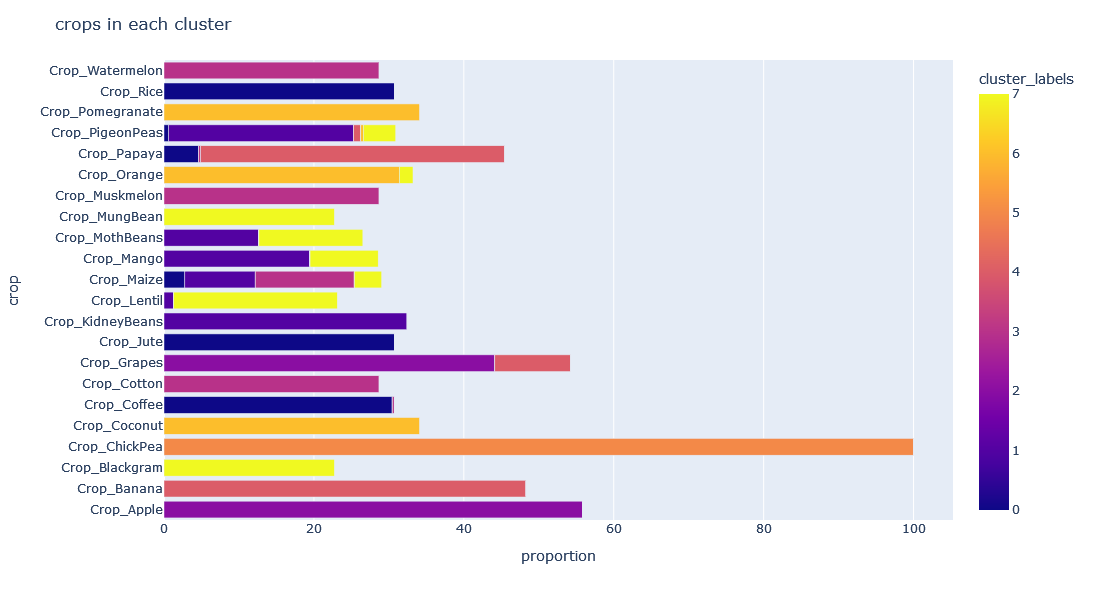

In [83]:
fig=px.bar(cluster_crop_melted,
           x='proportion',
           y='crop',
           orientation='h',
           color='cluster_labels')

fig.update_layout(title='crops in each cluster', 
                 width= 1000,
                 height= 600)
fig.show()

In [84]:
# to analyze the cluster characteristics
grouped= encoded_df.groupby('cluster_labels')[['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','pH_Value','Rainfall']].mean().reset_index()

In [85]:
grouped

cluster_labels    Nitrogen  Phosphorus  Potassium  Temperature   Humidity  \
0               0   83.870769   42.221538  36.618462    24.193846  73.581538   
1               1   25.675325   55.470779  21.928571    24.688312  41.204545   
2               2   21.284916  110.000000  80.000000    21.363128  87.173184   
3               3  102.977011   29.712644  37.347701    25.051724  82.795977   
4               4   72.077295   75.579710  52.874396    30.603865  84.787440   
5               5   40.090000   67.790000  78.520000    18.390000  20.000000   
6               6   19.870307   17.460751  27.378840    23.426621  91.812287   
7               7   26.479545   55.331818  20.447727    27.684091  66.109091   

   pH_Value    Rainfall  
0  6.187692  175.298462  
1  4.857143  104.386364  
2  5.446927   93.044693  
3  6.100575   55.586207  
4  5.700483  110.681159  
5  6.820000   79.500000  
6  5.941980  130.228669  
7  6.547727   62.747727

In [86]:
environ_condition=['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','pH_Value','Rainfall']
environ_condition

['Nitrogen',
 'Phosphorus',
 'Potassium',
 'Temperature',
 'Humidity',
 'pH_Value',
 'Rainfall']

In [87]:
# to melt the columns
melted= grouped.melt(id_vars= 'cluster_labels',
                     value_vars= environ_condition)

In [88]:
n_cluster=len(grouped['cluster_labels'].unique())

In [89]:
green_shades=px.colors.sequential.Greens

In [90]:
np.linspace(0.5, 0.9, n_cluster)

array([0.5       , 0.55714286, 0.61428571, 0.67142857, 0.72857143,
       0.78571429, 0.84285714, 0.9       ])

In [91]:
fig= px.bar(melted,
            x= 'cluster_labels',
            y= 'value',
            color= 'variable',
            color_discrete_sequence= green_shades,
            barmode= 'group',
            hover_data= ['cluster_labels', 'variable', 'value'])

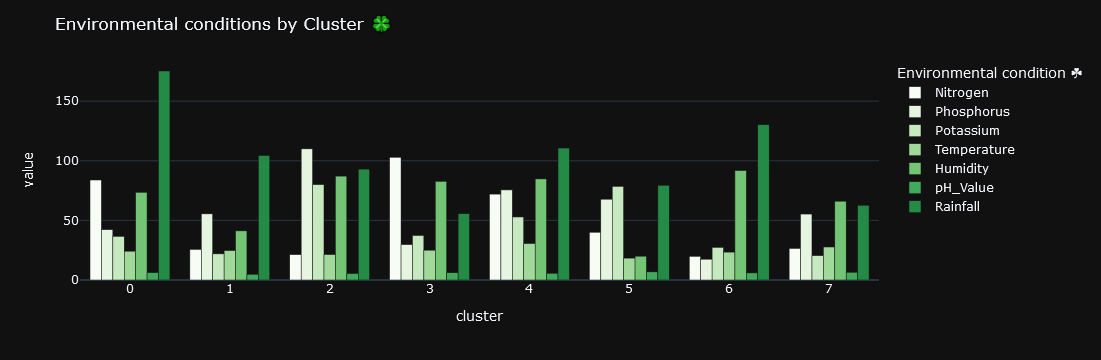

In [92]:
fig.update_layout(title= 'Environmental conditions by Cluster 🍀',
                  xaxis_title='cluster',
                  yaxis_title='value',
                  legend_title='Environmental condition ☘',
                  template= 'plotly_dark')


# Interpreting Cluster Profiles

### Cluster 1
* Environmental conditions: Low nitrogen, potassium, phosphorus, temperature, pH value and humidity. Slightly high rainfall
* Crops: KIDNEY BEANS, Lentil, Maize, Mango, Moth beans, pigeon peas
* Characteristics: Lentil, moth beans and pigeon peas are all legumes, hence they have the natural ability to fix nitrogen in the soil, thereby reducing the need for synthetic fertilizer. They are drought tolerant crops, possessssing the ability to tolerate limited water resources. The crops are known as climate-resillient crops.

### Cluster 2
* Environmental conditions: slightly high nitrogen and rainfall, low phosphorus, potassium, temperature, humidity, neutral pH value.
* Crops: Coffee, Cotton, Jute, Maize, Papaya, Banana and RICE.
* Characteristics: These are called warm season crops, They have high water requirements; rice needs flooded conditions while maize and papaya need consistent moisture. The crops also prefer a well draining fertile soil.

### Cluster 3
* Environmental conditions: Low pH, humidity, temperature and nitrogen, moderate rainfall and nitrogen level
* Crops: CHICK PEA
* Characteristics: Chickpea is a cool-season crop, thrives in low temperature, a leguminous crop that fixes nitrogen thereby reducing the need for synthetic nitrogen, requires careful irrigation management to prevent water-logging.

### Cluster 4
* Environmental conditions: Low Nitrogen, temperature and pH, High Potassium and phosphoruus level, 
* Crops: APPLE, Grape 
* Characteristics: They both require a period of cold weather to break dormancy and produce fruits, consistent moisture. They require moderate nitrogen and adequate Potassium and Phosphorus for optimal growth

### Cluster 5
* Environmental conditions: Low Nitrogen, Potassium, Phosphorus and Temperature, High humidity and Rainfall
* Crops: Pomegranate, Orange, Coconut and Papaya
* Characteristics: They thrive in tropical and sub-tropical environment..


### Cluster 6
* Environmental conditions: Slightly high level of nitrogen and humidity, low Potassium, Phosphorus, Temperature and Rainfall
* Crops: Watermelon, Muskmelon, Cotton
* Characteristics: They are also warm season crops, requires adequate nitrogen for healthy growth, prefer well drained and fertile soil.

### Cluster 7
* Environmental conditions:
* Crops: Banana, Papaya, Pigeon peas, Grapes
* Characteristics: , 

### Cluster 8
* Environmental conditions: Low level of Nitrogen, Potassium, Phosphorus and Temperature, moderate humidity and Rainfall
* Crops: Blackgram, Mungbeans, Mothbeans, Lentil, Orange, Pigeonpeas and Maize.
* Characteristics: ,
  

# Evaluation of Clustering Model

In [93]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [99]:
encoded_df.head()

Nitrogen  Phosphorus  Potassium  Temperature  Humidity  pH_Value  Rainfall  \
0        90          42         43           20        82         6       200   
1        85          58         41           21        80         7       200   
2        60          55         44           23        82         7       200   
3        74          35         40           26        80         6       200   
4        78          42         42           20        81         7       200   

   Crop_Apple  Crop_Banana  Crop_Blackgram  ...  Crop_Pomegranate  Crop_Rice  \
0           0            0               0  ...                 0          1   
1           0            0               0  ...                 0          1   
2           0            0               0  ...                 0          1   
3           0            0               0  ...                 0          1   
4           0            0               0  ...                 0          1   

   Crop_Watermelon  Category_Beverage  Category_Cereals  Category_Fibers  \
0                0                  0                 1                0   
1                0                  0                 1                0   
2                0                  0                 1                0   
3                0                  0                 1                0   
4                0                  0                 1                0   

   Category_Fruits  Category_Pulses  Category_Unkown  cluster_labels  
0                0                0                0               0  
1                0                0                0               0  
2                0                0                0               0  
3                0                0                0               0  
4                0                0                0               0  

[5 rows x 36 columns]

In [102]:
# Silhouette coefficient
silhouette = silhouette_score(encoded_df, cluster_labels)
print("Silhouette Coefficient:", silhouette)
# calinski harabasz Index
ch_index = calinski_harabasz_score(encoded_df, cluster_labels)
print("Calinski harabasz Index:", ch_index)
# Davies bouldin Index
db_index = davies_bouldin_score(encoded_df, cluster_labels)
print("Davies bouldin Index:", db_index)

Silhouette Coefficient: 0.3476373155626761
Calinski harabasz Index: 772.5441484882319
Davies bouldin Index: 1.2388221424441357


### Overall assessment
* Moderate clustering quality, clusters are somewhat separated but there may be an overlap between clusters
* Good cluster separation and density, Higher value in Calinski harabasz Index indicate better clustering quality
* There may be some cluster similarity. In Davies bouldin Index, values closer to zero indicate better clustering